**<font size = 5 > <font color = green> IMPORT MODULES**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

**<font size = 5 > <font color = green> LOADING DATA**

In [3]:
# Set file path and convert csv file to pandas data frame
file_path = r'C:\Users\Sarvesh\Desktop\STAT 4355 Assignments\STAT 4355 Final Project\admission_data.csv'
grad_df = pd.read_csv(file_path)

**<font size = 5 > <font color = green> CLEANING DATA**

In [4]:
# Assign column names
grad_df.columns = ['GRE', 'TOEFL', 'UnivRtg', 'SOP', 'LOR', 'CGPA', 'Research', 'AdmitChance']
# Remove duplicates
grad_df = grad_df.drop_duplicates()
# Remove entries with missing values
grad_df = grad_df.dropna()
# Check variable data types
# grad_df.info()

# Change scaling for AdmitChance
grad_df['AdmitChance'] = grad_df['AdmitChance'] * 100

# Subset data by university ratings
grad_df_ur_1 = grad_df[grad_df['UnivRtg'] == 1] # 34 observations
grad_df_ur_2 = grad_df[grad_df['UnivRtg'] == 2] # 126 observations
grad_df_ur_3 = grad_df[grad_df['UnivRtg'] == 3] # 162 observations
grad_df_ur_4 = grad_df[grad_df['UnivRtg'] == 4] # 105 observations
grad_df_ur_5 = grad_df[grad_df['UnivRtg'] == 5] # 73 observations

print(grad_df)

     GRE  TOEFL  UnivRtg  SOP  LOR  CGPA  Research  AdmitChance
0    337    118        4  4.5  4.5  9.65         1         92.0
1    324    107        4  4.0  4.5  8.87         1         76.0
2    316    104        3  3.0  3.5  8.00         1         72.0
3    322    110        3  3.5  2.5  8.67         1         80.0
4    314    103        2  2.0  3.0  8.21         0         65.0
..   ...    ...      ...  ...  ...   ...       ...          ...
495  332    108        5  4.5  4.0  9.02         1         87.0
496  337    117        5  5.0  5.0  9.87         1         96.0
497  330    120        5  4.5  5.0  9.56         1         93.0
498  312    103        4  4.0  5.0  8.43         0         73.0
499  327    113        4  4.5  4.5  9.04         0         84.0

[500 rows x 8 columns]


**<font size = 5 > <font color = green> EXPLORATORY DATA ANALYSIS**

In [ ]:
# Box Plot: University Rating vs GRE
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'GRE', x = 'UnivRtg', data = grad_df)
plt.title('GRE Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('GRE Score', fontsize = 14)
plt.show()

# Box Plot: University Rating vs TOEFL
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'TOEFL', x = 'UnivRtg', data = grad_df)
plt.title('TOEFL Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('TOEFL Score', fontsize = 14)
plt.show()

# Bar Plot: University Rating vs SOP 
plt.figure(figsize = (5, 3))
sop_counts = grad_df.groupby(['UnivRtg', 'SOP']).size().unstack()
sop_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('SOP Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title ='SOP Score', bbox_to_anchor =(1.5, 1), loc= 'upper left')
plt.tight_layout()
plt.show()

# Bar Plot: University Rating vs LOR
plt.figure(figsize = (5, 3))
lor_counts = grad_df.groupby(['UnivRtg', 'LOR'], observed = False).size().unstack()
lor_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('LOR Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'LOR Score', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Box Plot: University Rating vs CGPA
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'CGPA', x = 'UnivRtg', data = grad_df)
plt.title('CGPA Distribution by University Rating')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

# Bar Plot: University Rating vs Research
res_counts = grad_df.groupby(['UnivRtg', 'Research'], observed = False).size().unstack()
res_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('Research Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'Research', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Scatter Plot: GRE vs AdmitChance (grouped by University Rating)
grad_df['UnivRtg'] = grad_df['UnivRtg'].astype('category')

plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'GRE', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Set1', 
          line_kws = {'linewidth' : 3})
plt.title('GRE vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('GRE Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: TOEFL vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'TOEFL', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'coolwarm', 
          line_kws = {'linewidth' : 3})
plt.title('TOEFL vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('TOEFL Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: CGPA vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'CGPA', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Spectral', 
          line_kws = {'linewidth' : 3})
plt.title('CGPA vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('CGPA Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

**<font size = 5 > <font color = green> CORRELATION ANALYSIS**

**<font size = 5 > <font color = green> MODEL BUILDING**

***INITIAL MODEL ANALYSIS***

                            OLS Regression Results                            
Dep. Variable:            AdmitChance   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.37e-180
Time:                        22:29:33   Log-Likelihood:                -1602.4
No. Observations:                 500   AIC:                             3219.
Df Residuals:                     493   BIC:                             3248.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.3127     10.166    -12.917      0.0

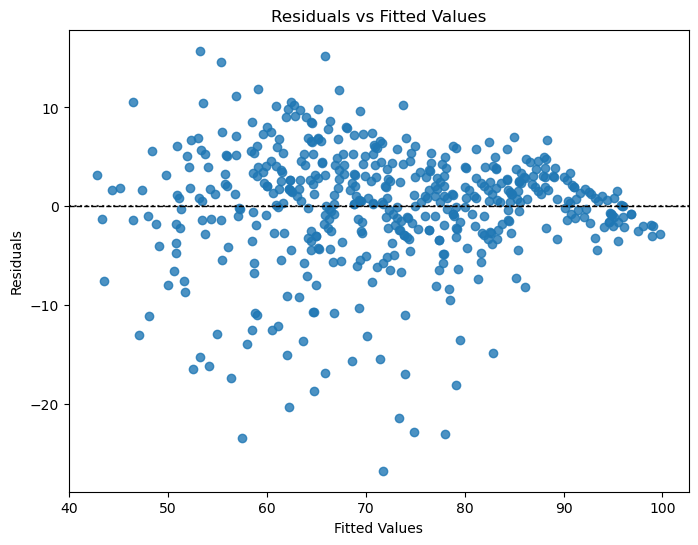

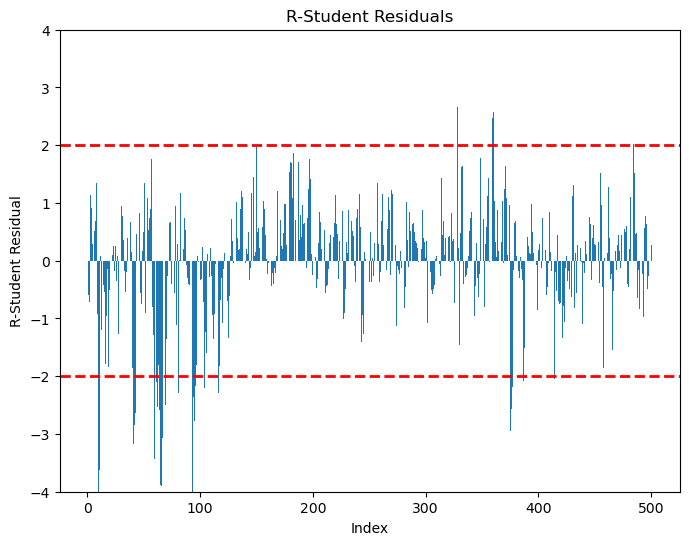

[  9  10  15  18  39  40  41  42  56  59  60  61  62  63  64  65  66  67
  68  80  91  92  93  94  95  96 103 105 114 115 116 149 178 179 180 182
 186 196 255 327 331 332 348 358 359 370 374 375 376 386 387 413 454 457
 465 483 484]


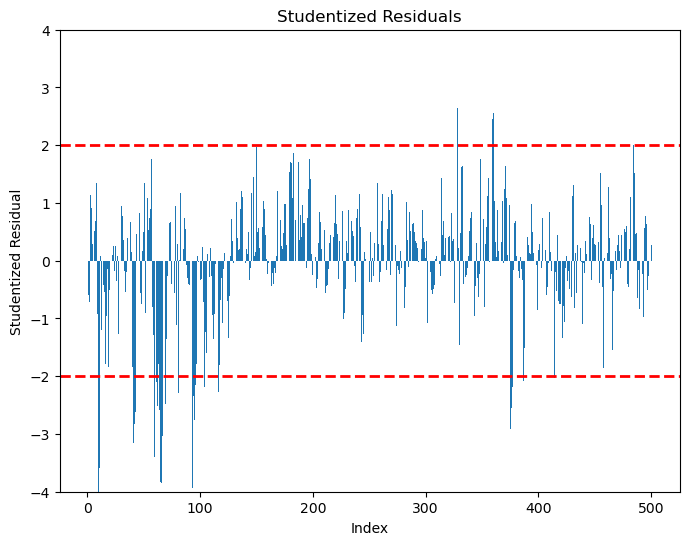

[  9  10  15  18  39  40  41  42  56  59  60  61  62  63  64  65  66  67
  68  80  91  92  93  94  95  96 103 105 114 115 116 149 178 179 180 182
 186 196 255 327 331 332 348 358 359 370 374 375 376 386 387 413 454 457
 465 483 484]


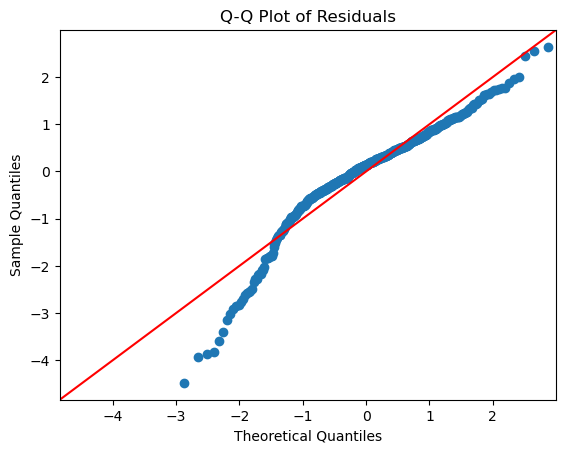

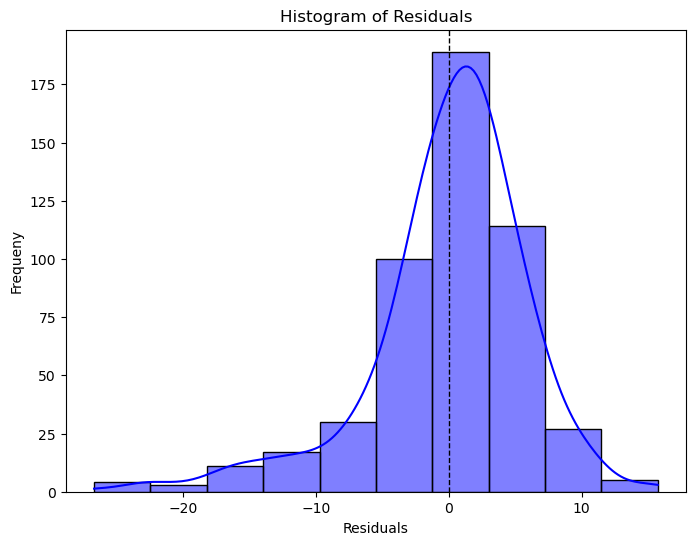

In [19]:
x_grad_df = grad_df[['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA', 'Research']]
y_grad_df = grad_df['AdmitChance']

x_grad_df = sm.add_constant(x_grad_df)
total_y = len(y_grad_df)

model_grad_df = sm.OLS(y_grad_df, x_grad_df).fit()
print(model_grad_df.summary())

# Build residual plot
residuals = model_grad_df.resid
R_stud_resid = model_grad_df.get_influence().resid_studentized_external
stud_resid = model_grad_df.get_influence().resid_studentized_internal
std_resid = residuals / np.std(residuals)
fitted = model_grad_df.fittedvalues

plt.figure(figsize = (8, 6))
sns.residplot(x = fitted, y = residuals, line_kws = {'color' : 'red', 'lw' : 2})
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Build R-Student Residuals Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(R_stud_resid) + 1), R_stud_resid)
plt.title('R-Student Residuals')
plt.xlabel('Index')
plt.ylabel('R-Student Residual')
plt.ylim(-4, 4)

plt.axhline(y=2, color='red', linewidth=2, linestyle='--')
plt.axhline(y=-2, color='red', linewidth=2, linestyle='--')

plt.show()
R_stud_out = np.where((R_stud_resid > 1.5) | (R_stud_resid < -1.5))[0]
print(R_stud_out)

# Build Studentized Residuals Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(stud_resid) + 1), stud_resid)
plt.title('Studentized Residuals')
plt.xlabel('Index')
plt.ylabel('Studentized Residual')
plt.ylim(-4, 4)

plt.axhline(y=2, color='red', linewidth=2, linestyle='--')
plt.axhline(y=-2, color='red', linewidth=2, linestyle='--')

plt.show()
stud_out = np.where((stud_resid > 1.5) | (stud_resid < -1.5))[0]
print(stud_out)

# Build QQ-Plot
sm.qqplot(residuals, line = '45', fit = True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Build Histogram of Residuals
plt.figure(figsize = (8, 6))
sns.histplot(residuals, kde = True, bins = math.ceil(math.log2(total_y) + 1), color = 'blue')
plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Residuals')
plt.ylabel('Frequeny')
plt.title('Histogram of Residuals')
plt.show()       

***TESTING INITIAL MODEL***

In [22]:
x_train_grad_df, x_test_grad_df, y_train_grad_df, y_test_grad_df = train_test_split(x_grad_df, y_grad_df, test_size = 0.2, random_state = 42)

# Define number of folds for k-fold cross-validation
k = 5  # You can adjust this number as needed
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_list = []  # List to store MSE values for each fold
r2_list = []  # List to store R² values for each fold
rmse_list = []  # List to store RMSE values for each fold

# K-fold Cross Validation
for train_index, test_index in kf.split(x_grad_df):
    # Split the data into training and testing sets for the current fold
    x_train_fold, x_test_fold = x_grad_df.iloc[train_index], x_grad_df.iloc[test_index]
    y_train_fold, y_test_fold = y_grad_df.iloc[train_index], y_grad_df.iloc[test_index]

    # Fit the model on the training data
    model_grad_df_split = sm.OLS(y_train_fold, sm.add_constant(x_train_fold)).fit()

    # Make predictions on the test data
    y_pred_fold = model_grad_df_split.predict(sm.add_constant(x_test_fold))

    # Calculate MSE, RMSE, and R² for the current fold
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred_fold)

    # Store the results for this fold
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average performance metrics across all folds
avg_mse = np.mean(mse_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print the cross-validation results
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Average R-squared (R²): {avg_r2}")

# Optionally, you can print the actual vs. predicted values from the last fold
act_vs_pred_grad_df = pd.DataFrame({
    'Actual': y_test_fold.values,  # Ensure we use values, not the index
    'Predicted': y_pred_fold
})

print(act_vs_pred_grad_df)

# Calculate VIF Values
vif_initial = pd.DataFrame()
vif_initial['Feature'] = x_train_grad_df.columns
vif_initial['VIF'] = [variance_inflation_factor(x_train_grad_df.values, i) for i in range(x_train_grad_df.shape[1])]
print(vif_initial)

Average Mean Squared Error (MSE): 37.01911055907764
Average Root Mean Squared Error (RMSE): 6.054923730399054
Average R-squared (R²): 0.8117180229064985
     Actual  Predicted
1      76.0  80.221720
13     62.0  64.666801
20     64.0  61.351060
21     70.0  68.419366
34     94.0  94.999995
..      ...        ...
486    68.0  64.633773
488    76.0  76.782387
492    53.0  59.434272
496    96.0  98.570684
499    84.0  81.664530

[100 rows x 2 columns]
    Feature          VIF
0     const  1401.942492
1       GRE     4.278099
2     TOEFL     3.872481
3       SOP     2.443873
4       LOR     1.900363
5      CGPA     4.498942
6  Research     1.459089


***FILTERED MODEL ANALYSIS***

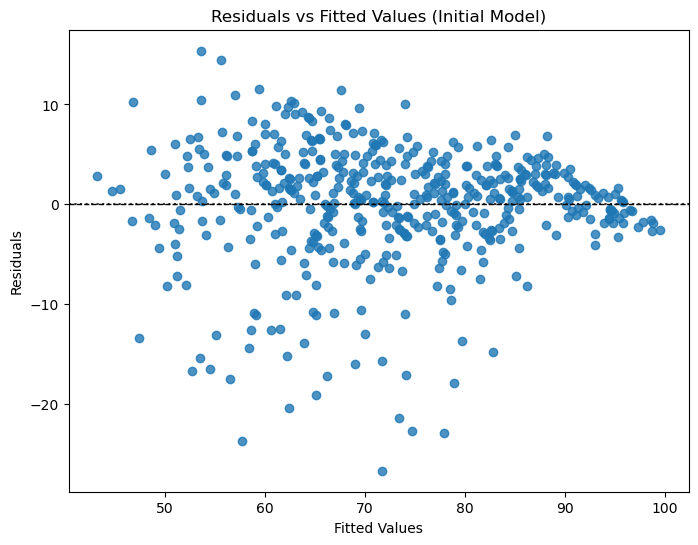

                            OLS Regression Results                            
Dep. Variable:            AdmitChance   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     681.0
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          9.83e-220
Time:                        23:16:26   Log-Likelihood:                -1246.0
No. Observations:                 449   AIC:                             2506.
Df Residuals:                     442   BIC:                             2535.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -117.3490      7.148    -16.417      0.0

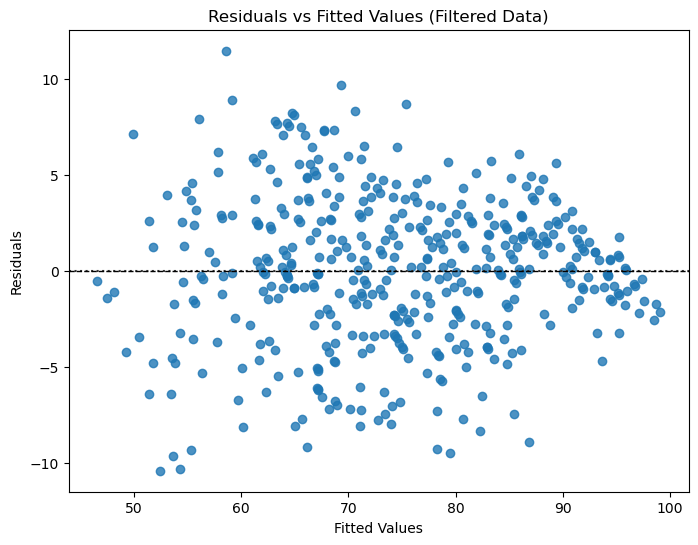

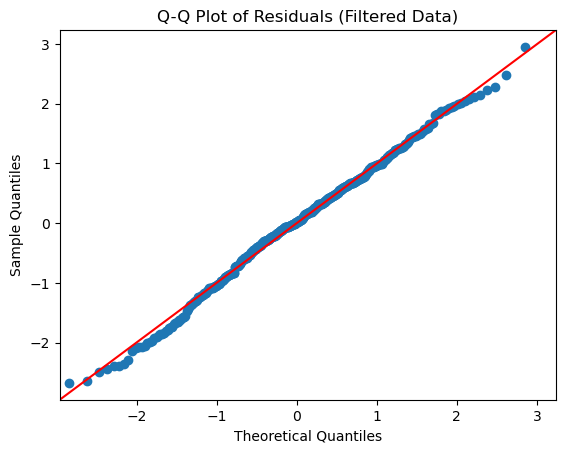

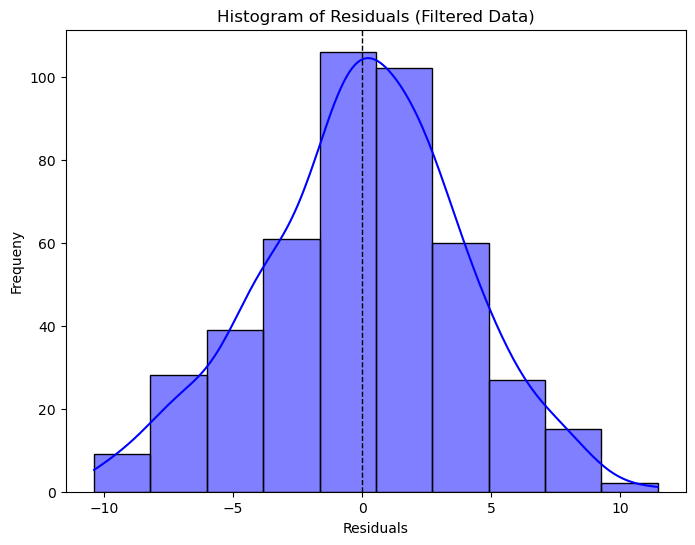

Mean Squared Error: 15.065011378809169
R-sqd : 0.9023801337663586
RMSE : 3.881367204840218
    Feature          VIF
0     const  1499.031738
1       GRE     4.412482
2     TOEFL     3.809752
3       SOP     2.539242
4       LOR     1.910825
5      CGPA     4.680549
6  Research     1.528673
     Actual  Predicted
0      92.0  95.247269
1      76.0  80.989679
2      72.0  66.987108
3      80.0  76.419179
4      65.0  64.670198
..      ...        ...
495    87.0  84.552118
496    96.0  98.528089
497    93.0  93.852520
498    73.0  71.190271
499    84.0  83.254967

[449 rows x 2 columns]


In [32]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bd = Q1 - 1.25 * IQR
    upper_bd = Q3 + 1.25 * IQR
    
    filtered_df = df[(df >= lower_bd) & (df <= upper_bd)]

    filtered_df = filtered_df.dropna()

    return filtered_df

filtered_data_out = remove_outliers(x_grad_df)
#filtered_data_out = remove_outliers(x_grad_df)
# filtered_data_out = x_grad_df.drop(index = stud_out)
filtered_target_out = y_grad_df[filtered_data_out.index]

initial_model = sm.OLS(filtered_target_out, filtered_data_out).fit()

# Build residual plot for the initial model
residuals = initial_model.resid
fitted_initial = initial_model.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_initial, y=residuals, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Initial Model)')
plt.show()

filtered_data = filtered_data_out[(residuals >= -9.0) & (residuals <= 14.5)]
filtered_target = filtered_target_out[(residuals >= -9.0) & (residuals <= 14.5)]

# -0.09 to 0.145

# filtered_data = x_grad_df[(residuals >= -0.1) & (residuals <= 0.1)]
# filtered_target = y_grad_df[(residuals >= -0.1) & (residuals <= 0.1)]

# Rebuild the model with the filtered data
filtered_model = sm.OLS(filtered_target, filtered_data).fit()
print(filtered_model.summary())

# Build residual plot for the filtered model
residuals_filtered = filtered_model.resid
fitted_filtered = filtered_model.fittedvalues
total_y = len(filtered_target)

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_filtered, y=residuals_filtered, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Filtered Data)')
plt.show()

# Build QQ-Plot for the filtered model
sm.qqplot(residuals_filtered, line = '45', fit = True)
plt.title('Q-Q Plot of Residuals (Filtered Data)')
plt.show()

# Build Histogram of Residuals for the filtered model
plt.figure(figsize = (8, 6))
sns.histplot(residuals_filtered, kde = True, bins = math.ceil(math.log2(total_y) + 1), color = 'blue')
plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Residuals')
plt.ylabel('Frequeny')
plt.title('Histogram of Residuals (Filtered Data)')
plt.show()

# Calculate VIF Values
vif_filtered_data = pd.DataFrame()
vif_filtered_data['Feature'] = filtered_data.columns
vif_filtered_data['VIF'] = [variance_inflation_factor(filtered_data.values, i) for i in range(filtered_data.shape[1])]
print(vif_filtered_data)

***TESTING FILTERED MODEL***

In [39]:
# Define number of folds for k-fold cross-validation
k = 5  # You can adjust this number as needed
kf = KFold(n_splits=k, shuffle=True, random_state= 42)

mse_list = []  # List to store MSE values for each fold
r2_list = []  # List to store R² values for each fold
rmse_list = []  # List to store RMSE values for each fold

# K-fold Cross Validation
for train_index, test_index in kf.split(filtered_data):
    # Split the data into training and testing sets for the current fold
    x_train_fold, x_test_fold = filtered_data.iloc[train_index], filtered_data.iloc[test_index]
    y_train_fold, y_test_fold = filtered_target.iloc[train_index], filtered_target.iloc[test_index]

    # Fit the model on the training data
    model_grad_df_split = sm.OLS(y_train_fold, sm.add_constant(x_train_fold)).fit()

    # Make predictions on the test data
    y_pred_fold = model_grad_df_split.predict(sm.add_constant(x_test_fold))

    # Calculate MSE, RMSE, and R² for the current fold
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred_fold)

    # Store the results for this fold
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average performance metrics across all folds
avg_mse = np.mean(mse_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print the cross-validation results
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Average R-squared (R²): {avg_r2}")

# Optionally, you can print the actual vs. predicted values from the last fold
act_vs_pred_grad_df = pd.DataFrame({
    'Actual': y_test_fold.values,  # Ensure we use values, not the index
    'Predicted': y_pred_fold
})

print(act_vs_pred_grad_df)

Average Mean Squared Error (MSE): 15.697911284897483
Average Root Mean Squared Error (RMSE): 3.9505462214774276
Average R-squared (R²): 0.8941250156642511
     Actual  Predicted
1      76.0  81.102580
17     65.0  68.266083
25     94.0  96.009290
26     76.0  77.243791
44     91.0  88.851684
..      ...        ...
485    70.0  68.623540
488    76.0  77.547016
491    54.0  57.446737
496    96.0  98.857316
499    84.0  83.023411

[89 rows x 2 columns]


***XGBOOST MODEL (NO SPLITS)***

In [ ]:
# Initializing XGBoost Model
xgb_model_full = xgb.XGBRegressor(
    objective = 'reg:squarederror', 
    n_estimators = 50, 
    learning_rate = 0.1, 
    max_depth = 3, 
    subsample = 0.8, 
    colsample_bytree = 1.0,
)

# Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10, 12],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'lambda': [0, 1, 2],
    'alpha': [0, 0.5, 1]
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_target, test_size=0.2, random_state=50)

# Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # Cross-validation folds
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Test the best model on the unseen test set
xgb_hyp_pred = best_xgb_model.predict(X_test)

# Calculate metrics on the test set
mse = mean_squared_error(y_test, xgb_hyp_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, xgb_hyp_pred)
print(f"Test Set Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Create a DataFrame to compare actual vs. predicted values
xgb_hyp_act_vs_pred = pd.DataFrame({
    'Actual': y_test, 
    'XGB_HYP_PRED': xgb_hyp_pred
})

print(xgb_hyp_act_vs_pred)

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits


***RANDOM FOREST MODEL (NO SPLITS)***

In [ ]:
# Random Forest Parameters for Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_target, test_size=0.2, random_state=50)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=50)

# Hyperparameter Tuning with GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # Cross-validation folds
    verbose=1
)

# Fit GridSearchCV on the training data
rf_grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {rf_grid_search.best_params_}")

# Get the best model from grid search
best_rf_model = rf_grid_search.best_estimator_

# Test the best model on the unseen test set
rf_hyp_pred = best_rf_model.predict(X_test)

# Calculate metrics on the test set
mse = mean_squared_error(y_test, rf_hyp_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, rf_hyp_pred)
print(f"Test Set Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Create a DataFrame to compare actual vs. predicted values
rf_hyp_act_vs_pred = pd.DataFrame({
    'Actual': y_test, 
    'RF_HYP_PRED': rf_hyp_pred
})

print(rf_hyp_act_vs_pred)